# Initialisation du notebook

## Formattage du notebook

La feuille de style CSS spécifie des options de style du notebook, 
vous pouvez ignorer cette partie liée à l affichage du notebook.
sur Jupyter, lancer Run > Run all cells avant File > Save and export as > HTML.  Mais le style ne semble pas s'appliquer aux cellules du code malheureusement.

In [1]:
%%html
<style>
h1 {
  text-align: center;
}
.jp-CodeCell .jp-InputArea {
    background-color: PaleTurquoise;
}
</style>


 ## Importer les bibliothèques Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A noter, avec des chunks Python, pour pouvoir générer le fichier sortie au format `pdf` ou `html`, il faut parfois exécuter les premiers chunks manuellement avant d'appuyer sur le bouton `Knit`.

## Reproductibilité

On commence par fixer une graine au générateur aléatoire, pour rendre les résultats reproductibles. Les séquences de nombres aléatoires générées seront toujours les mêmes (sauf si on change la graine bien sûr!).

In [3]:
# Fixer la graine pour la reproductibilité
np.random.seed(12345)

# Exercice 0. Robbins-Monro minimal - code fourni


On rappelle le principe de l'algorithme de Robbins-Monro:
$$ \Theta_{n+1} = \Theta_n - a_n G( \Theta_n). $$
à chaque étape, on descend dans la direction opposée du gradient, même lorsque ce dernier est entaché de bruit.

Considérons la fonction $\theta \mapsto \theta^2$, dont le minimum est en $\theta=0$. La fonction n'est pas connue de l'expérimentateur, mais supposons que l'on puisse évaluer un gradient bruité de cette fonction,  $G: \theta \mapsto 2\theta + \epsilon$, où $\epsilon$ est un bruit Gaussien centré et réduit.

On peut programmer Robbins-Monro avec un pas $a$ constant:

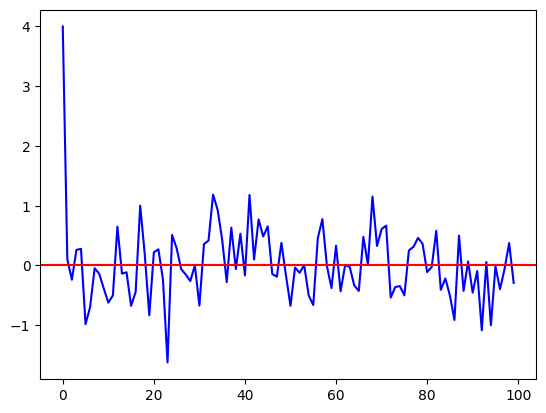

In [4]:
def G(theta):
    return 2 * theta + np.random.normal(0, 1)

a = 0.5
Theta = np.zeros(100)
Theta[0] = 4

for n in range(99):
    Theta[n + 1] = Theta[n] - a * G(Theta[n])

plt.plot(Theta, color='blue')
plt.axhline(0, color='red')
plt.show()

Que constatez-vous? comment l'interprétez-vous? sauriez-vous donner un argument mathématique à votre analyse?

In [5]:
# votre réponse en commentaire ici
# votre réponse en commentaire ici
# votre réponse en commentaire ici

In [6]:
# On s'attend à ce que la descente de gradient trouve le minimum theta=0
# Or, la suite semble osciller autour de cette valeur
# En effet, à chaque étape on ajoute un bruit de variance constante
# Le bruit ne se réduit jamais
# C'est une illustration du phénomène "noise ball" vu en cours

A présent, considérons **le même code**, en remplaçant $a$ par $a/n$, de sorte que les pas sont décroissants.

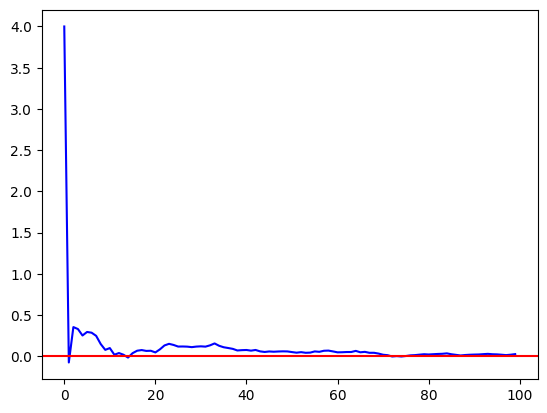

In [7]:
def G(theta):
    return 2 * theta + np.random.normal(0, 1)

a = 0.5
Theta = np.zeros(100)
Theta[0] = 4

for n in range(99):
    Theta[n + 1] = Theta[n] - a / (n + 1) * G(Theta[n])

plt.plot(Theta, color='blue')
plt.axhline(0, color='red')
plt.show()

Que constatez-vous? comment l'interprétez-vous? sauriez-vous donner un argument mathématique à votre analyse?

In [8]:
# votre réponse en commentaire ici
# votre réponse en commentaire ici
# votre réponse en commentaire ici

In [9]:
# On s'attend à ce que la descente de gradient trouve le minimum theta=0
# Or, la suite semble bien converger vers cette valeur
# A chaque étape, on ajoute un bruit dont la variance decroit
# La preuve formelle de la convergence est donnée dans le cours

# On peut imaginer faire de très nombreux essais dans une situation réelle.
# Si les calculs sont coûteux, on peut perdre beaucoup de temps!
# En conclusion, on gagne beaucoup de temps avec un peu de théorie...

Vous pouvez faire quelques essais ici, modifier la décroissance, la valeur des pas, etc. L'exercice suivant revient sur ces aspects en détail.

In [10]:
# Votre code ici.


# Exercice 1. Robbins-Monro sur fonction simple

Nous allons illustrer la descente de gradient stochastique au moyen d'une fonction très simple. L'intérêt sera de pouvoir comprendre le fonctionnement des algorithmes et de pouvoir comparer empiriquement les vitesses de convergence. L'illustration se veut minimale, mais couvre néanmoins les principaux écueils possibles de la convergence: *noise ball* et *biais*.

On supposera ici que la fonction à minimiser est
$$ f(\theta) =\frac{2\theta^2-4\theta+2}{\theta^2+1}\, .$$
Bien sûr, on suppose qu'on ignore la vraie expression de $f$, et que l'expérimentateur n'a accès qu'à des observations bruitées de la dérivée de $f$:
$$ G(\theta) = 4\frac{\theta^2-1}{(\theta^2+1)^2} + \epsilon(\theta) \, .$$
où les $\epsilon(\theta)$ sont des variables aléatoires gaussiennes centrées et réduites, mutuellement indépendantes.

**Remarque**:

Cette situation où l'on observe seulement un gradient bruité est très commune en Machine Learning, notamment lors de l'optimisation de réseaux de neurones:

* D'une part, le gradient est connu car la fonction appliquée est connue (une composition de fonctions d'activation).
* D'autre part, le gradient est entaché de bruit, car évalué sur un échantillon aléatoire de données.

Vous pouvez visualiser la fonction à l'aide de graphiques R, mais aussi à l'aide d'outils en ligne, comme <https://www.desmos.com/calculator/9wjwoq6gxi> .

## Question 1a. Gradient bruité et Robbins-Monro

Programmer la fonction $G$ et l'algorithme de Robbins-Monro:
$$ \Theta_{n+1} = \Theta_n - a_n G( \Theta_n). $$
On prendra des pas de la forme $$a_n=\frac{a}{n^\alpha}$$
où $a$, $\alpha$ sont des paramètres de la fonction. 

In [11]:
# votre code ici

In [12]:

def G(theta):
    return 4 * (theta**2 - 1) / ((theta**2 + 1)**2) + np.random.normal(0, 1)

def RobbinsMonro(thetainit, a, alpha, nmax=50):
    Theta = np.zeros(nmax)
    Theta[0] = thetainit
    for n in range(nmax - 1):
        Theta[n + 1] = Theta[n] - a / (n + 1)**alpha * G(Theta[n])
    return Theta

## Question 1b. Pas décroissant doucement et *convergence*

Tracer l'évolution de la suite $(\Theta_n)_{n=1,2, ..., n_{max}}$ pour $\alpha=1$ et pour différentes valeurs de $a$. On prendra par exemple une suite initialisée en $\Theta_1 = 2$, on pourra utiliser, par exemple $n_{max}=20$. Dans un premier temps, on peut essayer avec une décroissance des pas donnée par $\alpha=1$.

In [13]:
# votre code ici

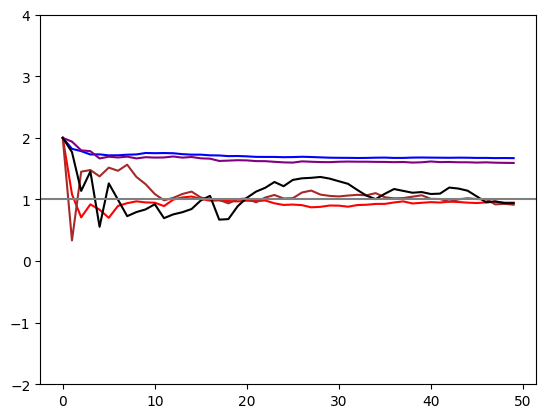

In [14]:

# constantes pour tracés et essais
mu = 1             # valeur cible
thetainit = 2      # valeur de départ de la suite

Theta1 = RobbinsMonro(thetainit, 0.1, alpha=1)
Theta2 = RobbinsMonro(thetainit, 0.25, alpha=1)
Theta3 = RobbinsMonro(thetainit, 0.5, alpha=1)
Theta4 = RobbinsMonro(thetainit, 1, alpha=1)
Theta5 = RobbinsMonro(thetainit, 2, alpha=1)

range_y = [-2, 4]  # zone de tracé des ordonnées
#ax = plt.gca()
#ax.set_ylim(range_y)

plt.plot(Theta1, color='blue', label='Theta1 (0.1)')
plt.plot(Theta2, color='purple', label='Theta2 (0.25)')
plt.plot(Theta3, color='red', label='Theta3 (0.5)')
plt.plot(Theta4, color='brown', label='Theta4 (1)')
plt.plot(Theta5, color='black', label='Theta5 (2)')
plt.axhline(mu, color='gray')
plt.ylim(range_y)
plt.show()

# les séries semblent se rapprocher peu à peu de la cible
# pour a=0.5 (en rouge), avec seed=123456, la convergence semble plus rapide
# cela peut s'expliquer en théorie (cf. cours)
# mais d'autres seeds conduisent à des résultats visuels différents
# il faut bien imaginer dans une situation pratique l'impact du choix de a...

## Question 1c. Décroissance trop lente. Pas constants et *noise ball*

Montrer que lorsque $\alpha=0$, c'est-à-dire lorsque les pas $a_n=a$ sont constants, la suite oscille dans une ``noise ball'' (cf. cours), pourquoi?

In [15]:
# votre code ici

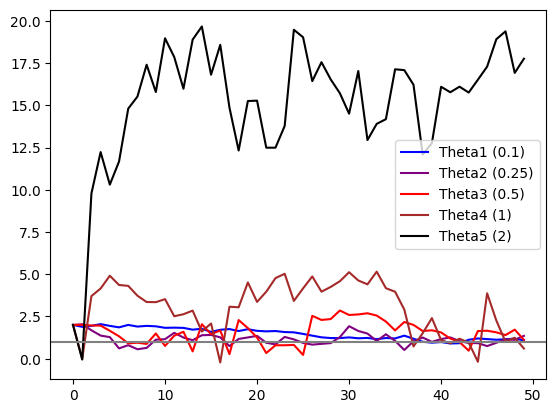

In [16]:
Theta1 = RobbinsMonro(thetainit, 0.1, alpha=0)
Theta2 = RobbinsMonro(thetainit, 0.25, alpha=0)
Theta3 = RobbinsMonro(thetainit, 0.5, alpha=0)
Theta4 = RobbinsMonro(thetainit, 1, alpha=0)
Theta5 = RobbinsMonro(thetainit, 2, alpha=0)

plt.plot(Theta1, color='blue', label='Theta1 (0.1)')
plt.plot(Theta2, color='purple', label='Theta2 (0.25)')
plt.plot(Theta3, color='red', label='Theta3 (0.5)')
plt.plot(Theta4, color='brown', label='Theta4 (1)')
plt.plot(Theta5, color='black', label='Theta5 (2)')
plt.axhline(mu, color='gray')

plt.legend()
plt.show()
# on observe bien une oscillation autour de la bonne valeur. En effet, avec des pas constants, le bruit n'est jamais réduit, il demeure à chaque itération.

## Question 1d. Pas décroissant trop vite et *biais*

Montrer qu'à l'inverse, si la décroissance des pas est trop rapide, par exemple donnée par $\alpha=2$, alors la suite semble souvent biaisée. Pourquoi?

In [17]:
# votre code ici

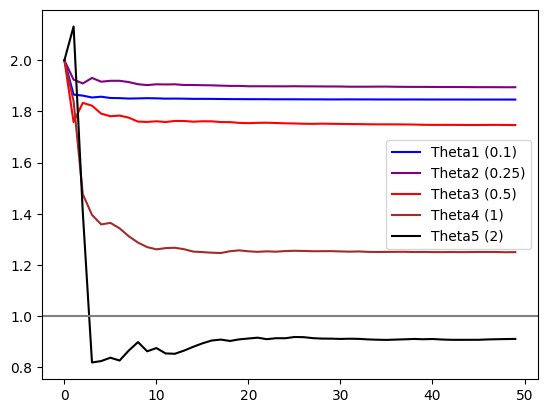

In [18]:
Theta1 = RobbinsMonro(thetainit, 0.1, alpha=2)
Theta2 = RobbinsMonro(thetainit, 0.25, alpha=2)
Theta3 = RobbinsMonro(thetainit, 0.5, alpha=2)
Theta4 = RobbinsMonro(thetainit, 1, alpha=2)
Theta5 = RobbinsMonro(thetainit, 2, alpha=2)

plt.plot(Theta1, color='blue', label='Theta1 (0.1)')
plt.plot(Theta2, color='purple', label='Theta2 (0.25)')
plt.plot(Theta3, color='red', label='Theta3 (0.5)')
plt.plot(Theta4, color='brown', label='Theta4 (1)')
plt.plot(Theta5, color='black', label='Theta5 (2)')
plt.axhline(mu, color='gray')

plt.legend()
plt.show()
# si les pas décroissent trop vite, la suite s'essoufle loin du minimiseur. Cf. cours.

## Question 1e. quelques extensions libres

* Vous pouvez vous amuser avec différentes valeurs de $a$ et de $\alpha$.
* Vous pouvez faire du l'averaging d'abscisse (postprocessing), constater que cela permet de diminuer $\alpha$.
* Essayer de tracer les erreurs biais, variance et erreur totale en fonction du pas.

N'hésitez pas à traiter en priorité l'exercice suivant, avant de revenir aux extensions libres.

In [19]:
# votre code ici

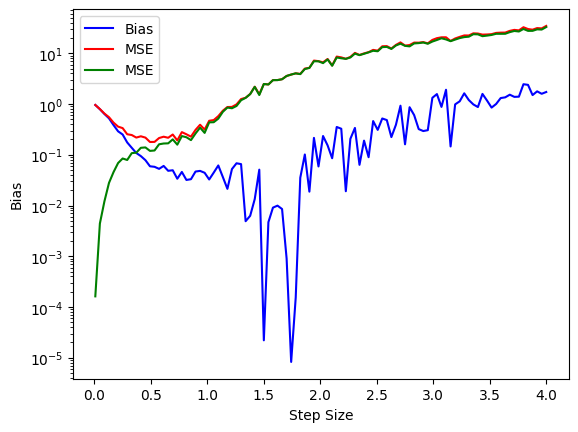

In [20]:
# Remind arguments: RobbinsMonro <- function(thetainit, a, alpha=1, nmax=50) 
# Try over nsimu iterations, and collect the last proposal at each iteration
# we plot here only bias for instance

def SeveralRobbinsMonro(thetainit, a, alpha=1, nmax=50, nsimu=100):
    Result = np.zeros(nsimu)
    for i in range(nsimu):
        Theta = RobbinsMonro(thetainit, a, alpha, nmax)
        Result[i] = Theta[-1]  # last value of the vector
    return Result

def RobbinsMonroForVaryingStepSize(thetainit, Steps, alpha=1, nmax=50, nsimu=100):
    nbSteps = len(Steps)
    trueTarget = mu
    Bias = np.zeros(nbSteps)
    Variance = np.zeros(nbSteps)
    for i in range(nbSteps):
        Resu = SeveralRobbinsMonro(thetainit, Steps[i], alpha, nmax, nsimu) 
        Bias[i] = (np.mean(Resu) - trueTarget) ** 2
        Variance[i] = np.var(Resu)
    return Bias, Variance

Steps = np.linspace(0.01, 4, 100)
Bias, Variance = RobbinsMonroForVaryingStepSize(thetainit=2, Steps=Steps, alpha=1, nmax=50, nsimu=500)
MSE = Bias + Variance 
plt.plot(Steps, Bias, color='blue', label='Bias', linestyle='-')
plt.plot(Steps, MSE , color='red', label='MSE', linestyle='-')
plt.plot(Steps, Variance , color='green', label='MSE', linestyle='-')
plt.yscale('log')
plt.xlabel('Step Size')
plt.ylabel('Bias')
plt.legend()
plt.show()

# A compléter avec compromis biais variance, notamment si alpha varie
# donne une idée d'un pas adapté pour nmax pas (différent pas optimal asymptotique)
# difficile de conclure dans la zone très erratiques, requiert plus d'essais

# Exercice 2. Estimation du gradient

On imagine désormais qu'un code de calcul renvoit, en fonction d'un paramètre $\theta$, une valeur réelle (par exemple lorsqu'il simule un phénomène). Pour fixer les idées, disons qu'il s'agit d'un frottement $f(\theta)$ à minimiser, en fonction d'un paramètre de forme $\theta$. Le code de calcul s'exécute très lentement, donc on souhaite faire le moins d'évaluation possible pour optimiser le paramètre $\theta$.

Pour les besoins du TP, nous prendrons la fonction 
$$f(\theta) := \frac{2\theta^2-4\theta+2}{\theta^2+1}$$

## Question 2a. Descente en l'absence de bruit

En l'absence de bruit, opérer une descente de gradient avec un budget de 50 évaluations de la fonction, en estimant le gradient par différence finie (ce qui requiert 2 évaluations par itération). Quel nouveau paramètre faut-il définir?

In [21]:
# vos réponses ici

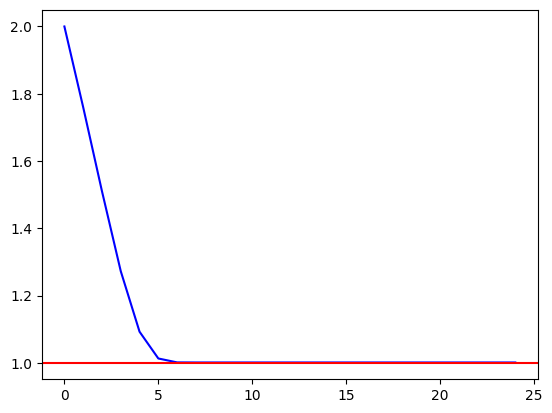

In [22]:
# Pour l'évaluation de la différence finie, il faut se doter d'un second pas
# Nous le noterons c
# En l'absence de bruit, on peut le prendre très petit
# Car la fonction est évaluée de façon exacte, aux minuscules erreurs numériques près

def f(theta):
    return (2 * theta**2 - 4 * theta + 2) / (theta**2 + 1)

nmax = 25
a = 0.5
c = 0.05
Theta = np.zeros(nmax)
Theta[0] = 2

for n in range(nmax - 1):
    Theta[n + 1] = Theta[n] - a * (f(Theta[n] + c) - f(Theta[n] - c)) / (2 * c)

plt.plot(Theta, color='blue') #, ylim=(-1, 3))
plt.axhline(1, color='red')
plt.show()

## Question 2b. Gradient estimé et descente en présence de bruit

Nous allons voir que la descente est beaucoup plus délicate en présence de bruit...

Supposons que le code de calcul n'est pas parfait, de sorte que chaque évaluation de $f(\theta)$ est entachée d'un bruit $\epsilon$, bruit Gaussien centré (chaque évaluation de la fonction conduit à un nouveau tirage de $\epsilon$), d'écart-type $0.1$.
Par exemple, le code de calcul peut utiliser un maillage imprécis, des approximations numériques, ou dépendre de simulations physiques incertaines (essais en soufflerie par exemple).

Adapter vos calculs pour faire la descente en présence du bruit epsilon.

Quelles questions se posent? La convergence vous semble-t-elle possible à obtenir? est-elle beaucoup plus lente en présence de bruit?

In [23]:
# Vos réponses ici

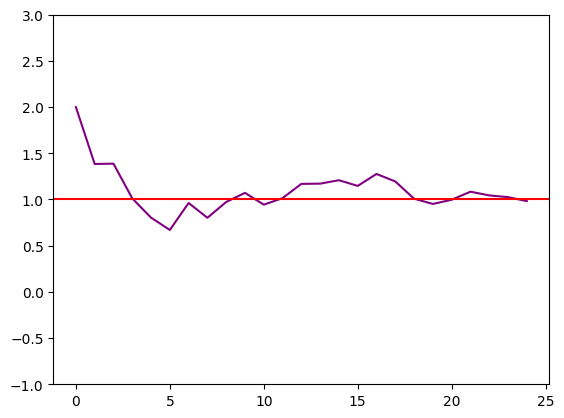

: 

In [ ]:
np.random.seed(123456)

def F(theta):
    return (2 * theta**2 - 4 * theta + 2) / (theta**2 + 1) + np.random.normal(0, 0.1)

nmax = 25
a = 0.5
c = 0.05
Theta = np.zeros(nmax)
Theta[0] = 2

for n in range(nmax - 1):
    cn = c / (n + 1)**(1/4)
    Theta[n + 1] = Theta[n] - a / (n + 1) * (F(Theta[n] + cn) - F(Theta[n] - cn)) / (2 * cn)

plt.plot(Theta, color='purple')
plt.ylim(-1, 3)  
plt.axhline(1, color='red')
plt.show()

# Les principales questions qui se posent sont
# le choix du pas a et de sa décroissance
# le choix du pas c et de sa décroissance

# On constate aisément que pour des pas constants, ou décroissant trop doucement,
# ça ne marche ... pas du tout!